In [1]:
import pandas as pd
from pathlib import Path
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
# Load Data
DATA_PATH = Path("../data/processed/cleaned_data.csv")
df= pd.read_csv(DATA_PATH)
df = df.copy()
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceMonth,DayOfWeek,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,12,Tuesday,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,12,Tuesday,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,12,Tuesday,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",27,2009-12-01 07:45:00,2.10,13085,United Kingdom,56.70,12,Tuesday,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,12,Tuesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...
767364,580501,23284,DOORMAT KEEP CALM AND COME IN,2,2011-12-04 13:00:00,7.50,14546,United Kingdom,15.00,12,Sunday,13
767365,580501,22507,MEMO BOARD RETROSPOT DESIGN,3,2011-12-04 13:00:00,4.95,14546,United Kingdom,14.85,12,Sunday,13
767366,580502,22469,HEART OF WICKER SMALL,3,2011-12-04 13:15:00,1.65,16931,United Kingdom,4.95,12,Sunday,13
767367,580502,23489,VINTAGE BELLS GARLAND,2,2011-12-04 13:15:00,2.89,16931,United Kingdom,5.78,12,Sunday,13


In [3]:
# Customer Similarity Analysis 
print("Building the Customer-Item Matrix")
# To make the computation manageable, we'll work with a subset of the most popular products
# Consider products purchased by at least 25 different customers
product_counts = df.groupby('StockCode')['Customer ID'].nunique()
popular_products = product_counts[product_counts >= 25].index

df_filtered = df[df['StockCode'].isin(popular_products)]
print(f"Working with {len(popular_products)} popular products.")


# Customer-item matrix using a pivot table
# Rows = Customers, Columns = Products, Values = Quantity Purchased
customer_item_matrix = df_filtered.pivot_table(
    index='Customer ID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

print(f"Customer-Item Matrix created with shape: {customer_item_matrix.shape}")

# Pairwise Customer Correlation 
print("\nCalculating customer similarity.")

# Transpose the matrix so that customers are the columns and then calculate the correlation
# This gives a similarity score between every pair of customers
customer_corr_df = customer_item_matrix.T.corr()

print(f"Customer similarity matrix created successfully.")
print(f"Shape of the final correlation matrix: {customer_corr_df.shape}")


print("\nSnippet of the Customer Similarity Matrix")
display(customer_corr_df.head())

Building the Customer-Item Matrix
Working with 3058 popular products.
Customer-Item Matrix created with shape: (5857, 3058)

Calculating customer similarity.
Customer similarity matrix created successfully.
Shape of the final correlation matrix: (5857, 5857)

Snippet of the Customer Similarity Matrix


Customer ID,12346,12347,12348,12349,12350,12351,12352,12353,12354,12355,...,18278,18279,18280,18281,18282,18283,18284,18285,18286,18287
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346,1.000000,-0.004903,-0.002774,0.003568,-0.002362,-0.002304,-0.003509,-0.002743,-0.003462,-0.002812,...,-0.002502,-0.002047,-0.002790,-0.002281,-0.001466,-0.007420,-0.002716,-0.001501,-0.001484,-0.005004
12347,-0.004903,1.000000,0.163169,-0.006678,0.008279,0.049185,0.004073,0.028076,0.006835,0.061152,...,0.009857,-0.008873,0.011661,0.028654,0.019271,0.112910,0.041777,-0.006506,0.028833,-0.000126
12348,-0.002774,0.163169,1.000000,-0.010994,-0.004968,-0.005651,-0.007515,-0.006728,0.013390,0.106977,...,-0.006138,-0.005020,-0.006844,-0.005595,-0.003596,0.138607,-0.006662,-0.003681,-0.010024,0.059397
12349,0.003568,-0.006678,-0.010994,1.000000,0.018515,0.002137,0.130325,0.212241,-0.009359,0.026013,...,0.007856,-0.008571,-0.010397,-0.004974,0.003586,0.081444,0.062332,-0.006285,0.036944,0.042549
12350,-0.002362,0.008279,-0.004968,0.018515,1.000000,-0.004812,-0.007466,0.054676,-0.007231,-0.005874,...,-0.005227,-0.004275,-0.005828,0.068180,-0.003062,0.010814,-0.005673,-0.003135,0.025234,-0.010452


#### Inference

This (5857 x 5857) matrix is essentially a lookup table for purchasing behavior similarity.It quantifies the "taste" relationship between every single customer in business.

##### Business Value:<br>
This matrix is the core engine of a collaborative filtering recommendation system. The next logical step is to use this matrix to find a customer's "taste neighbors" and identify potential cross-selling opportunities.

In [4]:
#Finding and Analyzing Taste Neighbors 

# Find a valid Target Customer who is a "Champion"
# Get the list of all champions from our RFM analysis

# Load the necessary RFM segment data
# This file contains the results of our RFM analysis.

rfm_final_df = pd.read_csv('../data/processed/modeling.csv', dtype={'Customer ID': str})
rfm_final_df.set_index('Customer ID', inplace=True)
champions = rfm_final_df[rfm_final_df['Segment'] == 'Champions'].index

# Champions who are also present in similarity matrix
valid_champions = [cid for cid in champions if cid in customer_corr_df.index]

# Select the first valid champion as target
if valid_champions:
    target_customer_id = valid_champions[0]
else:
    # Fallback, pick a random customer from the matrix
    target_customer_id = customer_corr_df.index[0]

# Most similar customers from correlation matrix
similar_customers = customer_corr_df[target_customer_id].sort_values(ascending=False)

# Display the top 5 most similar customers
print(f"Top 5 'Taste Neighbors' for Customer {target_customer_id} (a Champion)")
top_neighbors = similar_customers.iloc[1:6]
display(top_neighbors)

# Products to recommend
target_customer_products = customer_item_matrix.loc[target_customer_id]
target_customer_products = target_customer_products[target_customer_products > 0].index.tolist()

top_neighbor_id = top_neighbors.index[0]
neighbor_products = customer_item_matrix.loc[top_neighbor_id]
neighbor_products = neighbor_products[neighbor_products > 0].index.tolist()

recommendations = [product for product in neighbor_products if product not in target_customer_products]

print(f"\nProducts purchased by Top Neighbor ({top_neighbor_id}) that could be recommended to {target_customer_id}")
recommendation_details = df[df['StockCode'].isin(recommendations)][['StockCode', 'Description']].drop_duplicates().head(10)
display(recommendation_details)

Top 5 'Taste Neighbors' for Customer 12346 (a Champion)


Customer ID
15567    0.529427
17030    0.471991
16750    0.364870
12815    0.301548
15604    0.296663
Name: 12346, dtype: float64


Products purchased by Top Neighbor (15567) that could be recommended to 12346


,StockCode,Description
12045,21400,RED PUDDING SPOON
12046,21401,BLUE PUDDING SPOON
293264,22762,CUPBOARD 3 DRAWER MA CAMPAGNE
365368,22969,HOMEMADE JAM SCENTED CANDLES
455745,23178,JAM CLOCK MAGNET
473899,23154,SET OF 4 JAM JAR MAGNETS


#### Inference<br>

The analysis successfully identified a cluster of "taste neighbors" for our target Champion. The recommended products, such as "JAM CLOCK MAGNET" and "HOMEMADE JAM SCENTED CANDLES," show a clear thematic connection, proving that the model is capturing real-world product relationships.

##### Business Application:
This is the essence of 1-to-1 personalization. Instead of generic marketing, the business can now create highly targeted campaigns. For example, an automated email could be sent to customer 12346 with the subject "You might also like..." showcasing these specific jam-themed products, dramatically increasing the probability of a cross-sale.

In [5]:
# Market Basket Analysis
# First, we need a list of lists, where each inner list contains the
# items for a single transaction.
# We'll work with the UK data as it's the most dense.
df_uk = df[df['Country'] == 'United Kingdom']

# Group by 'Invoice' and create a list of items for each invoice
basket = df_uk.groupby('Invoice')['Description'].apply(list).reset_index(name='items')
transaction_list = basket['items'].tolist()

# One-Hot Encode the Data
# Use TransactionEncoder to transform this list into the required one-hot encoded format.
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

print("Data Prepared for Market Basket Analysis")
print(f"Shape of the one-hot encoded basket data: {basket_df.shape}")
display(basket_df.head())

Data Prepared for Market Basket Analysis
Shape of the one-hot encoded basket data: (33085, 5247)


,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Inference <br>
Sparse matrix created with a shape of (33085, 5247) i.e. we are analyzing 33,085 unique transactions (or "baskets") across a catalog of 5,247 unique products. The matrix is mostly False because any single transaction contains only a tiny fraction of the total products available.

In [6]:
# Market Basket Analysis
# Apply the Apriori algorithm to find frequent itemsets
# min_support=0.01 means we are looking for itemsets that appear in at least 1% of all transactions.
# use_colnames=True makes the output readable with product descriptions.
frequent_itemsets = apriori(basket_df, min_support=0.01, use_colnames=True)

# Sort the results by support for clarity
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print("Top Frequent Itemsets Found")
print(f"Found {len(frequent_itemsets)} frequent itemsets with support > 1%")
display(frequent_itemsets.head(15))

Top Frequent Itemsets Found
Found 709 frequent itemsets with support > 1%


,support,itemsets
497,0.141212,(WHITE HANGING HEART T-LIGHT HOLDER)
381,0.085537,(REGENCY CAKESTAND 3 TIER)
30,0.074898,(ASSORTED COLOUR BIRD ORNAMENT)
219,0.071513,(JUMBO BAG RED RETROSPOT)
315,0.058395,(PARTY BUNTING)
250,0.056884,(LUNCH BAG BLACK SKULL.)
388,0.054980,(REX CASH+CARRY JUMBO SHOPPER)
192,0.053196,(HOME BUILDING BLOCK WORD)
191,0.051866,(HEART OF WICKER SMALL)
190,0.051594,(HEART OF WICKER LARGE)


Inference<br>
 The support column tells the percentage of all transactions that contain the given product(s). For example, "WHITE HANGING HEART T-LIGHT HOLDER" is the most popular single item, appearing in over 14% of all baskets.

While this list confirms the most popular items, the real value comes from using these frequent itemsets to generate actionable cross-selling rules.

In [7]:
# Market Basket Analysis
# Generate Association Rules
# Take the frequent itemsets and generate association rules from them. These are the "if-then" statements that provide direct strategic value (e.g., "IF a customer buys {Product A}, THEN they are likely to buy {Product B}").

# We will evaluate these rules using two key metrics:

# Confidence: The probability that a customer will buy Product B, given that they have already bought Product A.

# Lift: How much more likely a customer is to buy Product B if they have Product A, compared to the average customer. A lift greater than 1 indicates a positive association. We will search for rules with a high lift.

# Generate the association rules from our frequent itemsets
# We will filter for rules with a lift of at least 4, meaning the items
# are at least 4 times more likely to be purchased together than on their own.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=4)

# Sort the rules by lift and confidence for clarity
rules = rules.sort_values(by=['lift', 'confidence'], ascending=False)

print(" Top Association Rules Found (min_lift > 4)")
print(f"Found {len(rules)} significant association rules.")

# Display the top 10 most powerful rules
display(rules.head(10))

 Top Association Rules Found (min_lift > 4)
Found 342 significant association rules.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
283,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.011727,0.015898,0.010488,0.894330,56.252670,1.0,0.010302,9.312961,0.993879,0.611993,0.892623,0.777013
282,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE LIVINGROOM ),0.015898,0.011727,0.010488,0.659696,56.252670,1.0,0.010302,2.904086,0.998091,0.611993,0.655658,0.777013
180,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.014115,0.015898,0.012060,0.854390,53.740464,1.0,0.011835,6.758462,0.995443,0.671717,0.852037,0.806472
181,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM ),0.015898,0.014115,0.012060,0.758555,53.740464,1.0,0.011835,4.083271,0.997247,0.671717,0.755098,0.806472
312,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.013239,0.015445,0.010246,0.773973,50.111318,1.0,0.010042,4.355910,0.993193,0.555738,0.770427,0.718689
313,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.015445,0.013239,0.010246,0.663405,50.111318,1.0,0.010042,2.931599,0.995419,0.555738,0.658889,0.718689
333,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.012543,0.017924,0.010095,0.804819,44.902944,1.0,0.009870,5.031626,0.990150,0.495549,0.801257,0.684029
332,(WOODEN STAR CHRISTMAS SCANDINAVIAN),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.017924,0.012543,0.010095,0.563238,44.902944,1.0,0.009870,2.260856,0.995574,0.495549,0.557690,0.684029
276,(RED STRIPE CERAMIC DRAWER KNOB),(BLUE STRIPE CERAMIC DRAWER KNOB),0.015868,0.017319,0.010609,0.668571,38.603291,1.0,0.010334,2.964986,0.989802,0.469880,0.662730,0.640568
277,(BLUE STRIPE CERAMIC DRAWER KNOB),(RED STRIPE CERAMIC DRAWER KNOB),0.017319,0.015868,0.010609,0.612565,38.603291,1.0,0.010334,2.540124,0.991263,0.469880,0.606318,0.640568


In [8]:
#Consolidate and Clean Association Rules
if 'rules' in locals() and not rules.empty:
    print(f"Consolidating {len(rules)} raw rules...")

    # Create a unique, sorted 'pair' for each rule
    # A frozenset is used because it is hashable and the order doesn't matter,
    # so frozenset({'A', 'B'}) is the same as frozenset({'B', 'A'})
    rules['pair'] = rules.apply(lambda row: frozenset(list(row['antecedents']) + list(row['consequents'])), axis=1)

    #Sort by lift to prioritize the strongest rules
    rules = rules.sort_values(by='lift', ascending=False)

    # Remove duplicates based on the 'pair', keeping the first occurrence (which is the one with the highest lift)
    actionable_rules = rules.drop_duplicates(subset=['pair'], keep='first').drop(columns=['pair'])

    print(f"Rules consolidated. Final actionable rule count: {len(actionable_rules)}")
    print("\nTop Actionable Association Rules")
    display(actionable_rules.head())

else:
    print("Please generate the 'rules' DataFrame first by running the association_rules function.")

Consolidating 342 raw rules...
Rules consolidated. Final actionable rule count: 153

Top Actionable Association Rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
283,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.011727,0.015898,0.010488,0.894330,56.252670,1.0,0.010302,9.312961,0.993879,0.611993,0.892623,0.777013
180,(POPPY'S PLAYHOUSE BEDROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.014115,0.015898,0.012060,0.854390,53.740464,1.0,0.011835,6.758462,0.995443,0.671717,0.852037,0.806472
312,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.013239,0.015445,0.010246,0.773973,50.111318,1.0,0.010042,4.355910,0.993193,0.555738,0.770427,0.718689
333,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.012543,0.017924,0.010095,0.804819,44.902944,1.0,0.009870,5.031626,0.990150,0.495549,0.801257,0.684029
276,(RED STRIPE CERAMIC DRAWER KNOB),(BLUE STRIPE CERAMIC DRAWER KNOB),0.015868,0.017319,0.010609,0.668571,38.603291,1.0,0.010334,2.964986,0.989802,0.469880,0.662730,0.640568


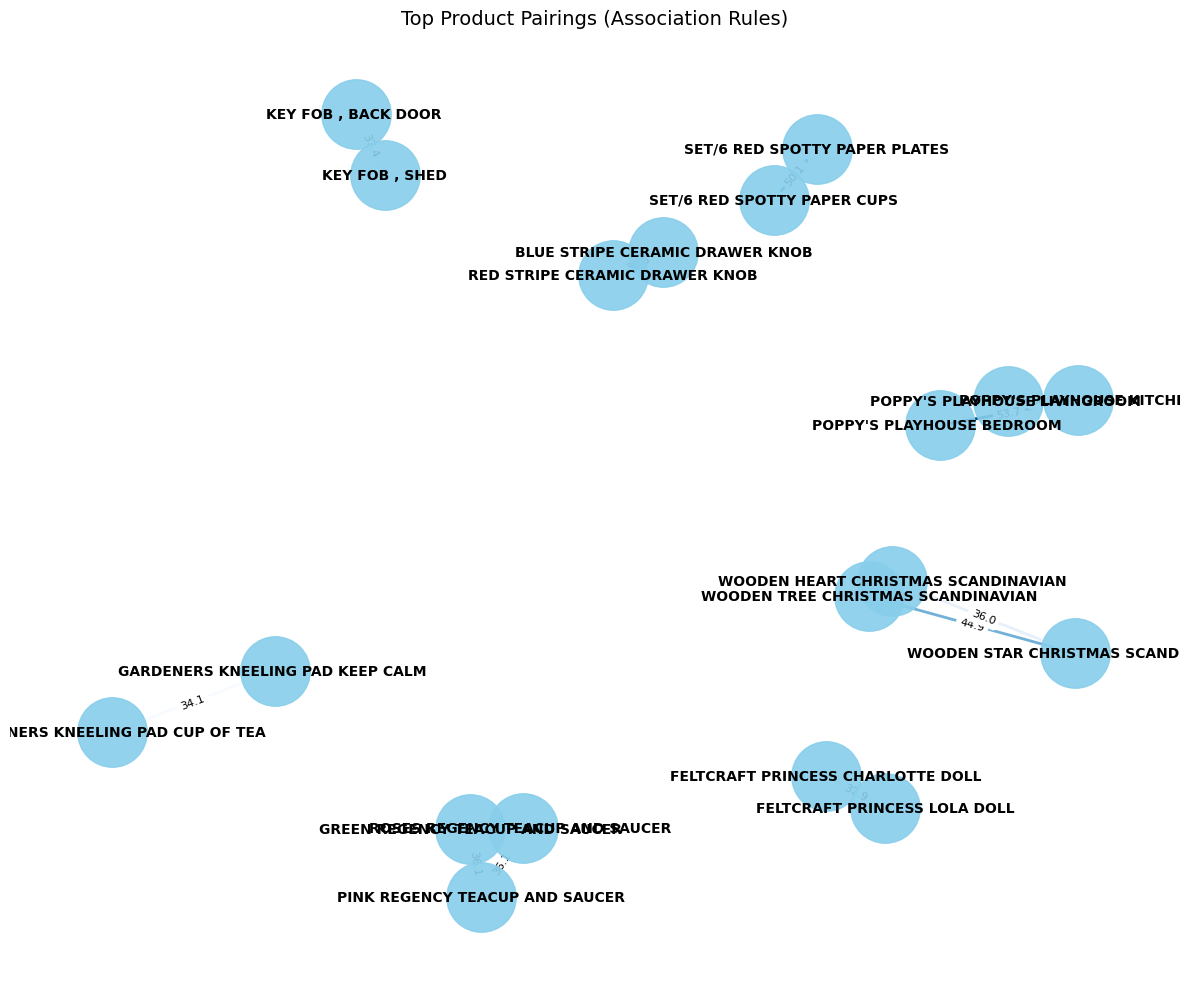

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Limit number of rules to display
top_rules = actionable_rules.head(10)

# Create graph
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Generate layout with better spacing
pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42)  # k controls spacing

# Extract edge weights for coloring
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Draw nodes
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=2500, alpha=0.9)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color=weights, edge_cmap=plt.cm.Blues, width=2, arrows=True)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

edge_labels = {(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Top Product Pairings (Association Rules)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

#### Inference
The analysis has successfully generated a set of highly reliable, actionable cross-selling rules. The key takeaway is the extremely high lift value (all rules are >38) for these product pairs.

A high lift score means that these items are not just bought together randomly; there is a very strong, predictable behavioral link. For example, customers who buy the "POPPY'S PLAYHOUSE LIVINGROOM" are 56 times more likely than the average customer to also buy the "POPPY'S PLAYHOUSE KITCHEN."

##### Business Insight: 
We have identified clear "product sets" or "collections" that customers want to complete. The desire to buy one part of a set is a massive predictor of the desire to buy another part.

##### Actionable Strategic Recommendations
Based on these rules, the business can immediately implement:
1. Product Bundling: Create virtual bundles on the website (e.g., a "Red Spotty Party Pack" or a "Poppy's Playhouse Starter Set") to make it easy for customers to buy the full set and to increase the average order value.
2. Smarter Recommendations: Update the website's "You might also like..." feature to explicitly use these rules. When a customer adds (SET/6 RED SPOTTY PAPER PLATES) to their cart, the first item recommended should be the matching cups.
3. Targeted Marketing: Create follow-up email campaigns. If a customer buys a (WOODEN STAR CHRISTMAS SCANDINAVIAN), send them an email a day later showcasing the matching (WOODEN TREE).

